In [1]:
# G2M insight for Cab Investment firm
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

ride_data = pd.read_csv('~/Downloads/Cab_Data.csv')
city_data = pd.read_csv('~/Downloads/City.csv')
customer_data = pd.read_csv('~/Downloads/Customer_ID.csv')
transaction_data = pd.read_csv('~/Downloads/Transaction_ID.csv')


In [2]:
#------ Data exploration ------
# -- Cab data --
'''
Data for transaction of 2 cab companies.
Every ride with a Yellow/Pink cab in a City, total KM travelled, the price charged by the cab driver and the actual
cost of the trip.
'''
print(ride_data.head())
print(ride_data.info())

# Total number of data points = 359392; Total no. of features = 7
# No missing data
# 'Date of Travel' - is int64 datatype. Excel converted date into a 5-digit serial number.
#                    The 5-digit number represents the number of days since 1899/12/30. [Check bookmarked webpage.]

# Converting 'Date of Travel' to datetime format
excel_dates = ride_data['Date of Travel']
new_date_col = []
for d in excel_dates:
    temp = datetime.date(1899,12,30) + datetime.timedelta(float(d))
    new_date_col.append(temp.strftime('%Y-%m-%d'))
    
ride_data['Travel_Date'] = new_date_col

# Shift Travel Data column to first
first_col = ride_data.pop('Travel_Date')
ride_data.insert(0, 'Travel_Date', first_col)
# print(ride_data.head())

# To check duplicate values using Travel_Date and Transaction ID features
print('Duplicate rows using Travel_Date and Transaction ID =',ride_data.duplicated(['Travel_Date', 'Transaction ID']).any())

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
Transaction ID    359392 non-null int64
Date of Travel    359392 non-null int64
Company           359392 non-null object
City              359392 non-null object
KM Travelled      359392 non-null float64
Price Charged     359392 non-null float64
Cost of

In [3]:
# -- City data --
'''
Data of population and total number of cab users in each city.
Users - Assuming users of all types of cabs (including the Yellow and Pink cabs)
'''
print(city_data.head())
# print(city_data.info())

# Converting Users column from object to float
floats_users = []
for user in city_data.Users:
    f_user = user.replace(",", "")
    floats_users.append(float(f_user))

city_data['Users'] = floats_users
# Total no. of entries = 20; No. of features = 3
# No missing values


             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 


In [4]:
# -- Customer data --
'''
Data of customers subscribed with the two cab companies.
Their Gender, Customer ID, Age and Income (USD/Month) given here.
'''
print(customer_data.info())
print(customer_data.head())
# Total no. of entries = 49171; No. of features = 4
# No missing values

print('Duplicate rows using features Customer ID and Income (USD/Month) =', customer_data.duplicated(['Customer ID', 'Income (USD/Month)']).sum())

# THIS DATA CAN BE JOINED WITH TRANSACTION DATA USING 'Customer ID'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
Customer ID           49171 non-null int64
Gender                49171 non-null object
Age                   49171 non-null int64
Income (USD/Month)    49171 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536
Duplicate rows using features Customer ID and Income (USD/Month) = 0


In [5]:
# -- Transaction data -- 
'''
Data containing the mode of transaction for each ride in the Yellow/Pink cab.
'''
print(transaction_data.info())
print(transaction_data.head())
# Total no. of entries = 440098;  No. of features = 3
# No missing values

print('Duplicate rows using features Transaction ID and Customer ID = ', transaction_data.duplicated(['Transaction ID', 'Customer ID']).sum())

# CAN JOIN TRANSACTION AND CUSTOMER DATA USING 'Customer ID'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
Transaction ID    440098 non-null int64
Customer ID       440098 non-null int64
Payment_Mode      440098 non-null object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card
Duplicate rows using features Transaction ID and Customer ID =  0


In [6]:
# ------ Data Aggregation ------
# INNER JOIN BETWEEN RIDE DATA AND CITY DATA

ride_city_out = pd.merge(ride_data, city_data, how = 'inner', on = 'City')
print(ride_city_out.shape)
print(ride_city_out.head())
print(ride_city_out.isnull().any())

# When tried an outer join, got null values in all the columns of ride_data for the city of SAN FRANCISCO CA.
# No cab ride data available for SAN FRANCISCO CA city. Hence opted for inner join between the dataframes.

print('Duplicate rows using feature Transaction ID = ', ride_city_out.duplicated(['Transaction ID']).sum())

(359392, 10)
  Travel_Date  Transaction ID  Date of Travel   Company        City  \
0  2016-01-08        10000011           42377  Pink Cab  ATLANTA GA   
1  2016-01-06        10000012           42375  Pink Cab  ATLANTA GA   
2  2016-01-02        10000013           42371  Pink Cab  ATLANTA GA   
3  2016-01-07        10000014           42376  Pink Cab  ATLANTA GA   
4  2016-01-03        10000015           42372  Pink Cab  ATLANTA GA   

   KM Travelled  Price Charged  Cost of Trip Population    Users  
0         30.45         370.95       313.635   814,885   24701.0  
1         28.62         358.52       334.854   814,885   24701.0  
2          9.04         125.20        97.632   814,885   24701.0  
3         33.17         377.40       351.602   814,885   24701.0  
4          8.73         114.62        97.776   814,885   24701.0  
Travel_Date       False
Transaction ID    False
Date of Travel    False
Company           False
City              False
KM Travelled      False
Price Charged 

In [7]:
# INNER JOIN BETWEEN TRANSACTION AND CUSTOMER DATA
transaction_out_cust = pd.merge(transaction_data, customer_data, how = 'inner', on = 'Customer ID')

print(transaction_out_cust.head())
print(transaction_out_cust.shape)
print(transaction_out_cust.isnull().any())
# NO NULL VALUES AFTER JOINING TRANSACTION AND CUSTOMER DATA

print('Duplicate rows using features Transaction ID and Customer ID = ', transaction_out_cust.duplicated(['Transaction ID', 'Customer ID']).sum())

   Transaction ID  Customer ID Payment_Mode Gender  Age  Income (USD/Month)
0        10000011        29290         Card   Male   28               10813
1        10351127        29290         Cash   Male   28               10813
2        10412921        29290         Card   Male   28               10813
3        10000012        27703         Card   Male   27                9237
4        10320494        27703         Card   Male   27                9237
(440098, 6)
Transaction ID        False
Customer ID           False
Payment_Mode          False
Gender                False
Age                   False
Income (USD/Month)    False
dtype: bool
Duplicate rows using features Transaction ID and Customer ID =  0


In [8]:
# INNER JOIN BETWEEN ride_city_out and transaction_out_cust dataframes
Final_table = pd.merge(ride_city_out, transaction_out_cust, how = 'inner', on = 'Transaction ID')
print(Final_table.shape)
Final_table = Final_table.sort_values('Travel_Date', ascending = True)

# FIRST RECORDED DATE OF CAB RIDE: 2016-01-02
# LAST RECORDED DATE OF CAB RIDE: 2018-12-31
print(Final_table.isnull().sum())

# When used 'outer' join, null values occurred in these columns - 'Travel_Date', 'Date of Travel', 'Company', 'City',
#                               'KM Travelled', 'Price Charged', 'Cost of Trip', 'Population', 'Users'
# No. of rows with null values = 80706
# There was no cab ride data for these rows, but only the data of the customer was present
# So with using 'inner' join, the rows with null values drop out
# Due to this, certain amount of customer data was lost
print('\n')
print('Duplicate rows using features Travel_Date, Transaction ID, Company and Customer ID = ',\
      Final_table.duplicated(['Travel_Date', 'Transaction ID', 'Company', 'Customer ID']).sum())

(359392, 15)
Travel_Date           0
Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


Duplicate rows using features Travel_Date, Transaction ID, Company and Customer ID =  0


In [9]:
# ACQUIRING THIRD PARTY DATASET - US HOLIDAY DATASET (2004 - 2021) [Source: Kaggle]
# url: https://www.kaggle.com/donnetew/us-holiday-dates-2004-2021
usholiday_data = pd.read_csv('~/Downloads/US Holiday Dates (2004-2021).csv')
print(usholiday_data.info())
# print(usholiday_data.head())
# Total no. of entries = 342; Total no. of features = 6
# No missing values

# Subsetting the US Holiday dataset based on the start and end date of the cab ride data
start_date = '2016-01-02'
end_date = '2018-12-31'

usholiday_final = usholiday_data[(usholiday_data['Date'] >= start_date) & (usholiday_data['Date'] <= end_date)]
usholiday_final = usholiday_final.sort_values('Date', ascending = True).reset_index(drop = True)
print(usholiday_final.head())
print(usholiday_final.shape)

print('\n')
print('Duplicate rows using feature Date = ', usholiday_final.duplicated(['Date']).sum())
print(usholiday_final[usholiday_final.duplicated(['Date'], keep = False) == True])
# Getting duplicate rows for the date of 2017-04-16
# Keeping the first row
usholiday_final.drop_duplicates('Date', keep = 'first', inplace = True)
usholiday_final = usholiday_final.reset_index(drop = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
Date       342 non-null object
Holiday    342 non-null object
WeekDay    342 non-null object
Month      342 non-null int64
Day        342 non-null int64
Year       342 non-null int64
dtypes: int64(3), object(3)
memory usage: 16.1+ KB
None
         Date                      Holiday WeekDay  Month  Day  Year
0  2016-01-18  Martin Luther King, Jr. Day  Monday      1   18  2016
1  2016-02-14              Valentine’s Day  Sunday      2   14  2016
2  2016-02-15        Washington's Birthday  Monday      2   15  2016
3  2016-03-27               Western Easter  Sunday      3   27  2016
4  2016-05-01               Eastern Easter  Sunday      5    1  2016
(56, 6)


Duplicate rows using feature Date =  1
          Date         Holiday WeekDay  Month  Day  Year
22  2017-04-16  Western Easter  Sunday      4   16  2017
23  2017-04-16  Eastern Easter  Sunday      4   16  2017


In [10]:
# JOINING THE FINAL DATA AND US HOLIDAY DATA
# THIS DATA WILL BE USED LATER WHEN ANALYSING RIDE DATA ON HOLIDAYS
# FOR THAT CASE, USE INNER JOIN FOR THE BELOW MERGE

# Use when analysing ride data on holidays
Holiday_data = pd.merge(Final_table, usholiday_final, how = 'inner', left_on = 'Travel_Date', right_on = 'Date', sort = True)
print(Holiday_data.shape)
print(Holiday_data.info())
print(Holiday_data.head())
# TOTAL NO. OF FEATURES = 20; TOTAL NO. OF OBSERVATIONS = 359854
print('Duplicate rows using features Transaction ID, Price Charged and Cost of Trip = ', Holiday_data.duplicated(['Transaction ID', 'Price Charged', 'Cost of Trip']).sum())

# Dropping 'Date column'
Holiday_data = Holiday_data.drop('Date', axis = 1)

(18644, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18644 entries, 0 to 18643
Data columns (total 21 columns):
Travel_Date           18644 non-null object
Transaction ID        18644 non-null int64
Date of Travel        18644 non-null int64
Company               18644 non-null object
City                  18644 non-null object
KM Travelled          18644 non-null float64
Price Charged         18644 non-null float64
Cost of Trip          18644 non-null float64
Population            18644 non-null object
Users                 18644 non-null float64
Customer ID           18644 non-null int64
Payment_Mode          18644 non-null object
Gender                18644 non-null object
Age                   18644 non-null int64
Income (USD/Month)    18644 non-null int64
Date                  18644 non-null object
Holiday               18644 non-null object
WeekDay               18644 non-null object
Month                 18644 non-null int64
Day                   18644 non-null int64
Ye

In [11]:
# --------- Exploratory Data Analysis ----------
df = Final_table.copy()
print(df.info())
# print(df.columns)
# print(df.describe())
# print(df.shape)

# 1. Profit 

# Price Charged and Cost of Trip features used to calculate the profit for the cab companies
# Creating new feature 'Profit'
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

# Adding new feature 'Income Group'
# Min. income = $2000.0; Max. income = $ 35000.0
# 2 - 10k, 10 - 20k, 20 - 35k
# Low, Medium, High
income_grp = []
for index,row in df.iterrows():
    if (row['Income (USD/Month)']>=2000) & (row['Income (USD/Month)']<10000):
        income_grp.append('Low')
    elif (row['Income (USD/Month)']>=10000) & (row['Income (USD/Month)']<20000):
        income_grp.append('Medium')
    elif row['Income (USD/Month)']>=20000:
        income_grp.append('High')

df['Income Group'] = income_grp

# Adding new feature 'Age Group'
# Min. Age - 18; Max. Age - 65
# 18 - 25; 26 - 40, 41 - 55, 56 - 65
age_group = []
for i, a in df.iterrows():
    if (a['Age']>=18) & (a['Age']<26):
        age_group.append('18-25')
    elif (a['Age']>=26) & (a['Age']<41):
        age_group.append('26-40')
    elif (a['Age']>=41) & (a['Age']<56):
        age_group.append('41-55')
    elif a['Age']>=56:
        age_group.append('56-65')

df['Age Group'] = age_group

# Creating new Year column
df['Year'] = pd.to_datetime(df['Travel_Date']).dt.year

# Creating new Month column
df['Month'] = pd.to_datetime(df['Travel_Date']).dt.month

# Yellow cab
yellow_cab = df[df['Company'] == 'Yellow Cab']
# print(yellow_cab.head())

# Pink cab
pink_cab = df[df['Company'] == 'Pink Cab']
# print(pink_cab.head())


# Total net profit in three years (2016-2018)
yellow_totalnetprofit = yellow_cab.Profit.sum()
print('Total net profit for three years (2016-2018) for yellow cab = $',yellow_totalnetprofit)

pink_totalnetprofit = pink_cab.Profit.sum()
print('Total net profit for three years (2016-2018) for pink cab = $',pink_totalnetprofit)

print('\n')
# Total number of rides with each company, 2016-2018
yellow_totalrides = yellow_cab['Transaction ID'].value_counts().sum()
print('Total number of rides with the yellow cab = ',yellow_totalrides)

pink_totalrides = pink_cab['Transaction ID'].value_counts().sum()
print('Total number of rides with the pink cab = ', pink_totalrides)

print('\n')
# Total km travelled by each cab company, 2016-2018
yellow_totalkm = yellow_cab['KM Travelled'].sum()
print('Total KM Travelled with the yellow cab = ', yellow_totalkm, 'km')

pink_totalkm = pink_cab['KM Travelled'].sum()
print('Total KM Travelled with the pink cab = ', pink_totalkm, 'km')

print('\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 167158 to 105779
Data columns (total 15 columns):
Travel_Date           359392 non-null object
Transaction ID        359392 non-null int64
Date of Travel        359392 non-null int64
Company               359392 non-null object
City                  359392 non-null object
KM Travelled          359392 non-null float64
Price Charged         359392 non-null float64
Cost of Trip          359392 non-null float64
Population            359392 non-null object
Users                 359392 non-null float64
Customer ID           359392 non-null int64
Payment_Mode          359392 non-null object
Gender                359392 non-null object
Age                   359392 non-null int64
Income (USD/Month)    359392 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 43.9+ MB
None
Total net profit for three years (2016-2018) for yellow cab = $ 44020373.17079999
Total net profit for three years (2016-2018) for pink cab = 

Mean profit for yellow cab:
    Year  MeanProfit     Company
0  2016  169.347821  Yellow Cab
1  2017  168.817057  Yellow Cab
2  2018  143.416122  Yellow Cab
Mean profit for pink cab:
    Year  MeanProfit   Company
0  2016   68.321819  Pink Cab
1  2017   67.070839  Pink Cab
2  2018   53.229689  Pink Cab
   Year  MeanProfit     Company
0  2016  169.347821  Yellow Cab
1  2017  168.817057  Yellow Cab
2  2018  143.416122  Yellow Cab
3  2016   68.321819    Pink Cab
4  2017   67.070839    Pink Cab
5  2018   53.229689    Pink Cab


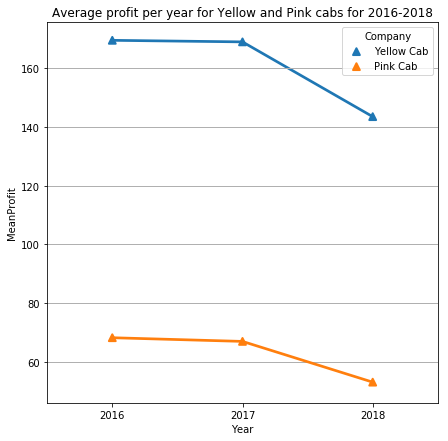

In [13]:
# 2. Average profit per year for each company
yellow_meanprofit = pd.DataFrame(yellow_cab.groupby('Year').agg({'Profit':'mean'})).reset_index()
yellow_meanprofit.rename(columns = {'Profit':'MeanProfit'}, inplace = True)
yellow_meanprofit['Company'] = 'Yellow Cab'
print('Mean profit for yellow cab:\n', yellow_meanprofit)

pink_meanprofit = pd.DataFrame(pink_cab.groupby('Year').agg({'Profit':'mean'})).reset_index()
pink_meanprofit.rename(columns = {'Profit':'MeanProfit'}, inplace = True)
pink_meanprofit['Company'] = 'Pink Cab'
print('Mean profit for pink cab:\n', pink_meanprofit)

merged_meanprofit = pd.concat([yellow_meanprofit, pink_meanprofit]).reset_index(drop = True)
print(merged_meanprofit)

# Plotting average profit per year for both cab companies
plt.figure(figsize = (7,7))
plt.title('Average profit per year for Yellow and Pink cabs for 2016-2018')
plt.grid(linestyle = '-', linewidth = 1)
sns.pointplot(x = 'Year', y = 'MeanProfit', data = merged_meanprofit, hue = 'Company',markers = '^')

# plt.savefig('Average_Profit_per_year.png')
plt.show()

Average profit per km for the Yellow cab in 2016-2018:
    Year  Average Profit per km     Company
0  2016               7.487720  Yellow Cab
1  2017               7.483920  Yellow Cab
2  2018               6.362446  Yellow Cab
Average profit per km for the Pink cab in 2016-2018:
    Year  Average Profit per km   Company
0  2016               3.040784  Pink Cab
1  2017               2.965274  Pink Cab
2  2018               2.357667  Pink Cab


Average profit per ride for the Yellow cab in 2016-2018:
    Year  Average Profit per ride     Company
0  2016               169.347821  Yellow Cab
1  2017               168.817057  Yellow Cab
2  2018               143.416122  Yellow Cab
Average profit per ride for the Pink cab in 2016-2018:
    Year  Average Profit per ride   Company
0  2016                68.321819  Pink Cab
1  2017                67.070839  Pink Cab
2  2018                53.229689  Pink Cab


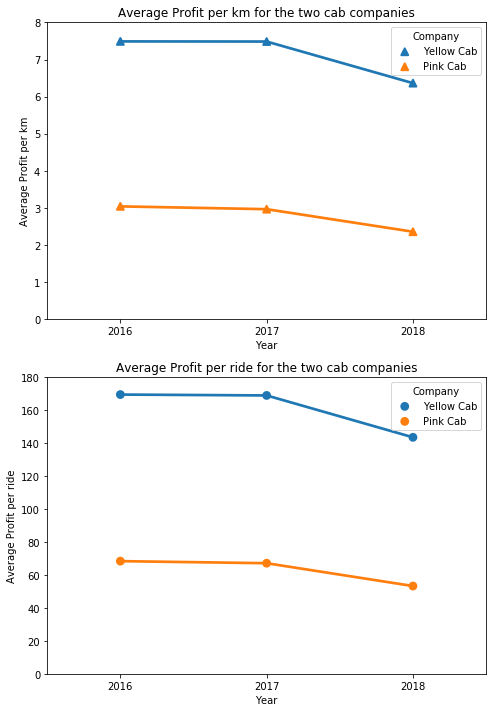

In [14]:
# 3. Average profit per km and per ride
# per km
yellow_avgprofitperkm = yellow_cab.groupby('Year')['Profit'].sum() / yellow_cab.groupby('Year')['KM Travelled'].sum()
yellow_avgprofitperkm = pd.DataFrame(yellow_avgprofitperkm, columns = ['Average Profit per km']).reset_index()
yellow_avgprofitperkm['Company'] = 'Yellow Cab'
print('Average profit per km for the Yellow cab in 2016-2018:\n',yellow_avgprofitperkm)

pink_avgprofitperkm = pink_cab.groupby('Year')['Profit'].sum() / pink_cab.groupby('Year')['KM Travelled'].sum()
pink_avgprofitperkm = pd.DataFrame(pink_avgprofitperkm, columns = ['Average Profit per km']).reset_index()
pink_avgprofitperkm['Company'] = 'Pink Cab'
print('Average profit per km for the Pink cab in 2016-2018:\n',pink_avgprofitperkm)

yellow_pink_avgprofitperkm = pd.concat([yellow_avgprofitperkm, pink_avgprofitperkm]).reset_index(drop = True)

# per ride
print('\n')
yellow_avgprofitperride = yellow_cab.groupby('Year').Profit.sum()/yellow_cab.groupby('Year')['Transaction ID'].count()
yellow_avgprofitperride = pd.DataFrame(yellow_avgprofitperride).rename({0: 'Average Profit per ride'}, axis = 1).reset_index()
yellow_avgprofitperride['Company'] = 'Yellow Cab'
print('Average profit per ride for the Yellow cab in 2016-2018:\n', yellow_avgprofitperride)

pink_avgprofitperride = pink_cab.groupby('Year').Profit.sum()/pink_cab.groupby('Year')['Transaction ID'].count()
pink_avgprofitperride = pd.DataFrame(pink_avgprofitperride).rename({0: 'Average Profit per ride'}, axis = 1).reset_index()
pink_avgprofitperride['Company'] = 'Pink Cab'
print('Average profit per ride for the Pink cab in 2016-2018:\n', pink_avgprofitperride)

yellow_pink_avgprofitperride = pd.concat([yellow_avgprofitperride, pink_avgprofitperride]).reset_index(drop = True)

# Plotting the average profit per km and per ride in 2016-2018
Fig, Axis = plt.subplots(2, 1, figsize = (7,10))

sns.pointplot(ax = Axis[0], x = "Year", y = "Average Profit per km", data = yellow_pink_avgprofitperkm, hue = 'Company', markers = '^')
Axis[0].set_title('Average Profit per km for the two cab companies')

sns.pointplot(ax = Axis[1], x = "Year", y = "Average Profit per ride", data = yellow_pink_avgprofitperride, hue = 'Company', markers = 'o')
Axis[1].set_title('Average Profit per ride for the two cab companies')

Axis[0].set_ylim(0, 8)
Axis[1].set_ylim(0, 180)
# plt.savefig('Average_Profit_per_kmride.png')
plt.tight_layout()
plt.show()

   Year  Profit share %     Company
0  2016       95.273532  Yellow Cab
1  2017       94.811028  Yellow Cab
2  2018       95.002812  Yellow Cab
   Year  Profit share %   Company
0  2016       87.077352  Pink Cab
1  2017       85.610633  Pink Cab
2  2018       87.966564  Pink Cab


Net profit of Yellow cab per year:
    Year    Net Profit     Company
0  2016  1.392700e+07  Yellow Cab
1  2017  1.657598e+07  Yellow Cab
2  2018  1.351740e+07  Yellow Cab
Net profit of Pink cab per year:
    Year   Net Profit   Company
0  2016  1713511.224  Pink Cab
1  2017  2033654.908  Pink Cab
2  2018  1560162.189  Pink Cab


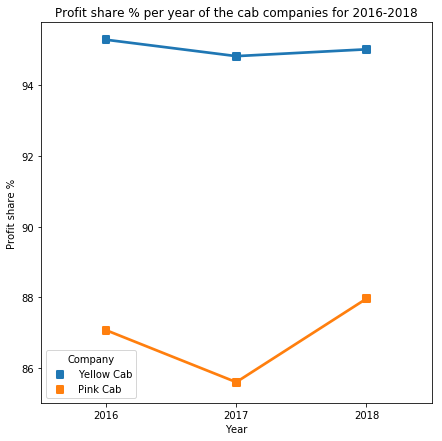

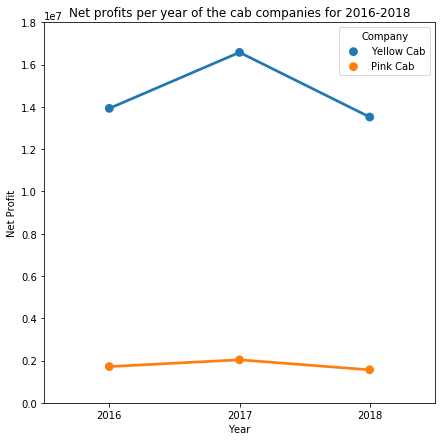

In [15]:
# 4. Profitable ride % and Net Profits per year for the cab companies
# Profitable ride % per year
y_profit_perc = yellow_cab[yellow_cab.Profit>0].groupby('Year').Profit.count()*100/yellow_cab.groupby('Year').Profit.count()
y_profit_perc = pd.DataFrame(y_profit_perc).rename({'Profit':'Profit share %'}, axis = 1).reset_index()
y_profit_perc['Company'] = 'Yellow Cab'
print(y_profit_perc)

p_profit_perc = pink_cab[pink_cab.Profit>0].groupby('Year').Profit.count()*100/pink_cab.groupby('Year').Profit.count()
p_profit_perc = pd.DataFrame(p_profit_perc).rename({'Profit':'Profit share %'}, axis = 1).reset_index()
p_profit_perc['Company'] = 'Pink Cab'
print(p_profit_perc)
y_p_profitperc = pd.concat([y_profit_perc, p_profit_perc]).reset_index(drop = True)

# Net profits per year
print('\n')
y_netprofit_peryear = pd.DataFrame(yellow_cab.groupby('Year').Profit.sum()).rename({'Profit':'Net Profit'}, axis = 1).reset_index()
y_netprofit_peryear['Company'] = 'Yellow Cab'
print('Net profit of Yellow cab per year:\n', y_netprofit_peryear)
p_netprofit_peryear = pd.DataFrame(pink_cab.groupby('Year').Profit.sum()).rename({'Profit':'Net Profit'}, axis = 1).reset_index()
p_netprofit_peryear['Company'] = 'Pink Cab'
print('Net profit of Pink cab per year:\n', p_netprofit_peryear)
y_p_netprofits = pd.concat([y_netprofit_peryear, p_netprofit_peryear]).reset_index(drop = True)


# Plotting the profitable ride % for yellow and pink cabs in 2016-2018
plt.figure(figsize = (7,7))
plt.title('Profit share % per year of the cab companies for 2016-2018')
sns.pointplot(x = 'Year', y = 'Profit share %', data = y_p_profitperc, hue = 'Company', markers = 's')
# plt.savefig('Profit share % per year.png')
plt.show()

# Plotting the net profits per year for the Yellow and Pink cabs in 2016-2018
plt.figure(figsize = (7,7))
plt.title('Net profits per year of the cab companies for 2016-2018')
sns.pointplot(x = 'Year', y = 'Net Profit', data = y_p_netprofits, hue = 'Company', markers = 'o')
plt.ylim(0, 18000000)
# plt.savefig('Net Profits per year.png')
plt.show()

Profitable ride % for Yellow and Pink cabs:
          City  Profitable ride %     Company
0  ATLANTA GA          98.515962  Yellow cab
1   AUSTIN TX          96.994716  Yellow cab
2   BOSTON MA          87.700971  Yellow cab
3  CHICAGO IL          87.954892  Yellow cab
4   DALLAS TX          99.982260  Yellow cab


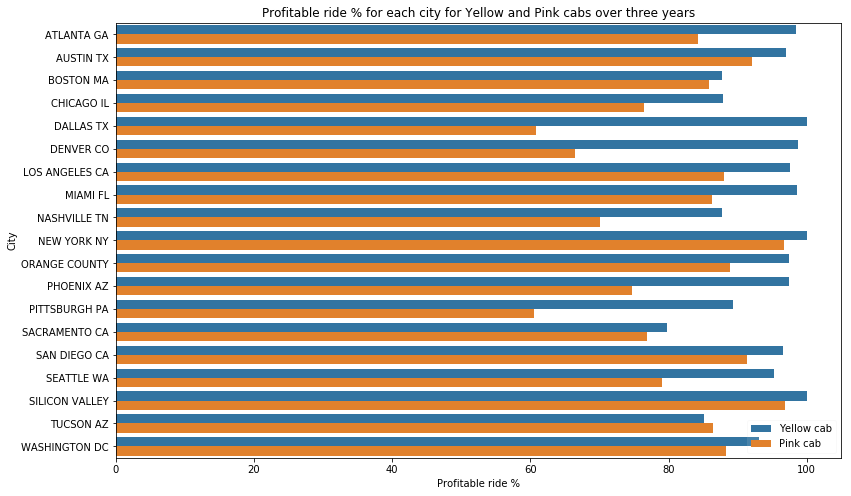

In [16]:
# 5. City-wise analysis
# 5.1. % of rides giving profit in each city for the Yellow and Pink cabs

# What is the % of rides giving profit out of all rides for Yellow and Pink cab companies in each city?
# Each Transaction ID represents a ride
# print(df.Profit.describe())
# In the Profit column, if the value is negative it implies the ride contributed to a loss for the company

yellow_profitable_rides = yellow_cab[yellow_cab.Profit >= 0]
yellow_profitableperc_rides = yellow_profitable_rides.groupby('City')['Transaction ID'].count() * 100/yellow_cab.groupby('City')['Transaction ID'].count()
yellow_profitableperc_rides = pd.DataFrame(yellow_profitableperc_rides).rename({'Transaction ID':'Profitable ride %'}, axis = 1).reset_index()
yellow_profitableperc_rides['Company'] = 'Yellow cab'
# print(yellow_profitableperc_rides.head())

pink_profitable_rides = pink_cab[pink_cab.Profit >= 0]
pink_profitableperc_rides = pink_profitable_rides.groupby('City')['Transaction ID'].count() * 100/pink_cab.groupby('City')['Transaction ID'].count()
pink_profitableperc_rides = pd.DataFrame(pink_profitableperc_rides).rename({'Transaction ID':'Profitable ride %'}, axis = 1).reset_index()
pink_profitableperc_rides['Company'] = 'Pink cab'
# print(pink_profitableperc_rides.head())

profitableperc_rides = pd.concat([yellow_profitableperc_rides, pink_profitableperc_rides]).reset_index(drop = True)
print('Profitable ride % for Yellow and Pink cabs:\n', profitableperc_rides.head())

# Plotting the profitable ride percentage
plt.figure(figsize = (13,8))
plt.title('Profitable ride % for each city for Yellow and Pink cabs over three years')
sns.barplot(x = 'Profitable ride %', y = 'City', hue = 'Company', data = profitableperc_rides)

plt.legend(framealpha = 0.1)
# plt.xticks(rotation = 90)
# plt.savefig('Profitable_ride_%_for_each_city_over_three_years.png')
plt.show()



City-wise profit distribution for both cab companies in 2016-2018:
         City      Profit Company
0  ATLANTA GA  128.797723  Yellow
1   AUSTIN TX  125.249582  Yellow
2   BOSTON MA   61.483619  Yellow
3  CHICAGO IL   64.924486  Yellow
4   DALLAS TX  195.849415  Yellow


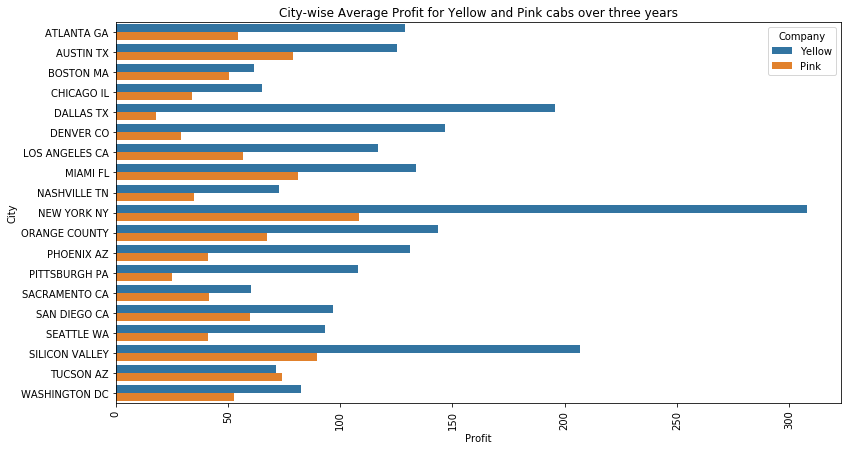

In [17]:
# 5.2. City-wise average profits of the cab companies for three years (2016-2018)

yellow_citywise_profit = yellow_cab.groupby('City').Profit.mean()
yellow_citywise_profit = pd.DataFrame(yellow_citywise_profit).reset_index()
yellow_citywise_profit['Company'] = 'Yellow'
# print(yellow_citywise_profit.head())

pink_citywise_profit = pink_cab.groupby('City').Profit.mean()
pink_citywise_profit = pd.DataFrame(pink_citywise_profit).reset_index()
pink_citywise_profit['Company'] = 'Pink'
# print(pink_citywise_profit.head())

citywise_profitperc = pd.concat([yellow_citywise_profit, pink_citywise_profit]).reset_index(drop = True)
print('\nCity-wise profit distribution for both cab companies in 2016-2018:')
print(citywise_profitperc.head())

# Plotting the profit % city-wise for both cab companies
plt.figure(figsize = (13,7))
plt.title('City-wise Average Profit for Yellow and Pink cabs over three years')

sns.barplot(x = 'Profit', y = 'City', data = citywise_profitperc, hue = 'Company')

plt.xticks(rotation = 90)
# plt.savefig('City-wise_Profit_share_%_over_three_years.png')
plt.show()


/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


Any customer with both cab companies:  False


Gender based contribution to the profits of the Yellow cab in 2016-2018:
    Year  Gender   Profit %
0  2016  Female  40.075560
1  2016    Male  59.924440
2  2017  Female  41.651541
3  2017    Male  58.348459
4  2018  Female  41.767988
5  2018    Male  58.232012
Gender based contribution to the profits of the Pink cab in 2016-2018:
    Year  Gender   Profit %
0  2016  Female  42.970343
1  2016    Male  57.029657
2  2017  Female  44.104089
3  2017    Male  55.895911
4  2018  Female  44.694460
5  2018    Male  55.305540


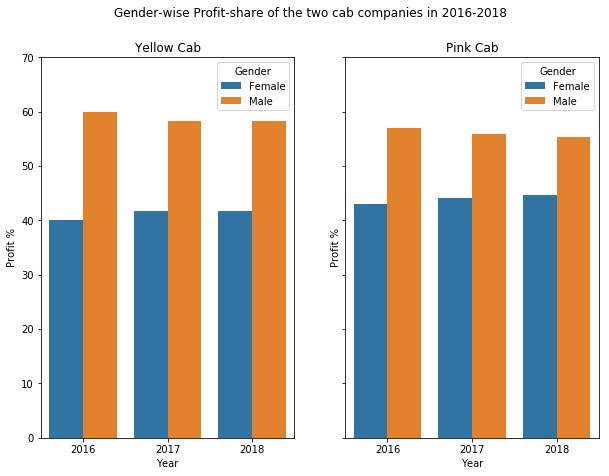

In [21]:
# 6. Customer based profit analysis
# Every customer ID represents a customer

# To check if there are any customers registered with both cab companies
# print(set(yellow_cab['Customer ID']) == set(pink_cab['Customer ID']))
boolean = yellow_cab['Customer ID'].unique() == pink_cab['Customer ID'].unique()
print('Any customer with both cab companies: ', boolean)
print('\n')

# 6.1. Gender-based customer contribution to the net profit for the cab companies for 2016-2018

# Yellow cab
y_gender_profit_contri = yellow_cab.groupby(['Year', 'Gender'])['Profit'].sum()*100/yellow_cab.groupby('Year').Profit.sum()
y_gender_profit_contri = pd.DataFrame(y_gender_profit_contri).rename({'Profit':'Profit %'}, axis = 1).reset_index()
print('Gender based contribution to the profits of the Yellow cab in 2016-2018:\n', y_gender_profit_contri)

# Pink cab
p_gender_profit_contri = pink_cab.groupby(['Year', 'Gender'])['Profit'].sum()*100/pink_cab.groupby('Year').Profit.sum()
p_gender_profit_contri = pd.DataFrame(p_gender_profit_contri).rename({'Profit':'Profit %'}, axis = 1).reset_index()
print('Gender based contribution to the profits of the Pink cab in 2016-2018:\n', p_gender_profit_contri)

# Plotting the gender-wise profit-share of Yellow and Pink cabs in 2016-2018
fig, axis = plt.subplots(1, 2, figsize = (10,7), sharey = True)
fig.suptitle('Gender-wise Profit-share of the two cab companies in 2016-2018')
sns.barplot(ax = axis[0], x = 'Year', y = 'Profit %', hue = 'Gender', data = y_gender_profit_contri)
sns.barplot(ax = axis[1], x = 'Year', y = 'Profit %', hue = 'Gender', data = p_gender_profit_contri)

axis[0].set_title('Yellow Cab')
axis[1].set_title('Pink Cab')

axis[0].set_ylim(0, 70)
# plt.savefig('Gender-wise_profit-share_in_2016-2018.png')
plt.show()


Gender-wise customer share for the Yellow cab per year:
    Year  Gender  % Customer-share
0  2016    Male         58.826104
1  2016  Female         41.173896
2  2017    Male         57.444317
3  2017  Female         42.555683
4  2018    Male         57.185448
5  2018  Female         42.814552
Gender-wise customer share for the Pink cab per year:
    Year  Gender  % Customer-share
0  2016    Male         56.646730
1  2016  Female         43.353270
2  2017    Male         55.558854
3  2017  Female         44.441146
4  2018    Male         55.196179
5  2018  Female         44.803821


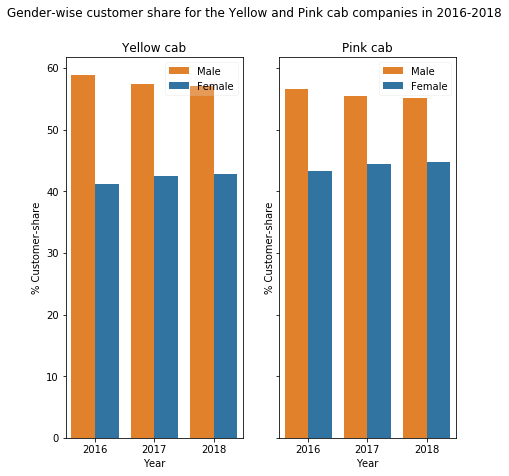

In [35]:
# 6.2. Gender-wise analysis on the customer base of the Yellow and Pink cab companies in 2016-2018
# % of Male and Female customers of the two cab companies in 2016-2018
# Yellow cab
y_gender_contri = yellow_cab.groupby('Year').Gender.value_counts() * 100/yellow_cab.groupby('Year').Gender.count()
y_gender_contri = pd.DataFrame(y_gender_contri).rename({'Gender':'% Customer-share'}, axis = 1).reset_index()
print('Gender-wise customer share for the Yellow cab per year:\n', y_gender_contri)

# Pink cab
p_gender_contri = pink_cab.groupby('Year').Gender.value_counts() * 100/pink_cab.groupby('Year').Gender.count()
p_gender_contri = pd.DataFrame(p_gender_contri).rename({'Gender':'% Customer-share'}, axis = 1).reset_index()
print('Gender-wise customer share for the Pink cab per year:\n', p_gender_contri)

# Plotting gender-wise customer share for the Yellow and Pink cab companies in 2016-2018
fig,axes = plt.subplots(1, 2, figsize = (7,7), sharex = True, sharey = True)
fig.suptitle('Gender-wise customer share for the Yellow and Pink cab companies in 2016-2018')
sns.barplot(ax = axes[0], x = 'Year', y = '% Customer-share', hue = 'Gender', data = y_gender_contri, hue_order = ['Male', 'Female'], palette = {'Male':'C1', 'Female':'C0'})
axes[0].set_title('Yellow cab')

sns.barplot(ax = axes[1], x = 'Year', y = '% Customer-share', hue = 'Gender', data = p_gender_contri, hue_order = ['Male', 'Female'], palette = {'Male':'C1', 'Female':'C0'})
axes[1].set_title('Pink cab')

axes[0].legend(framealpha = 0.2)
axes[1].legend(framealpha = 0.2)

# plt.savefig('Gender-wise_customer_share_in_2016-2018.png')
plt.show()


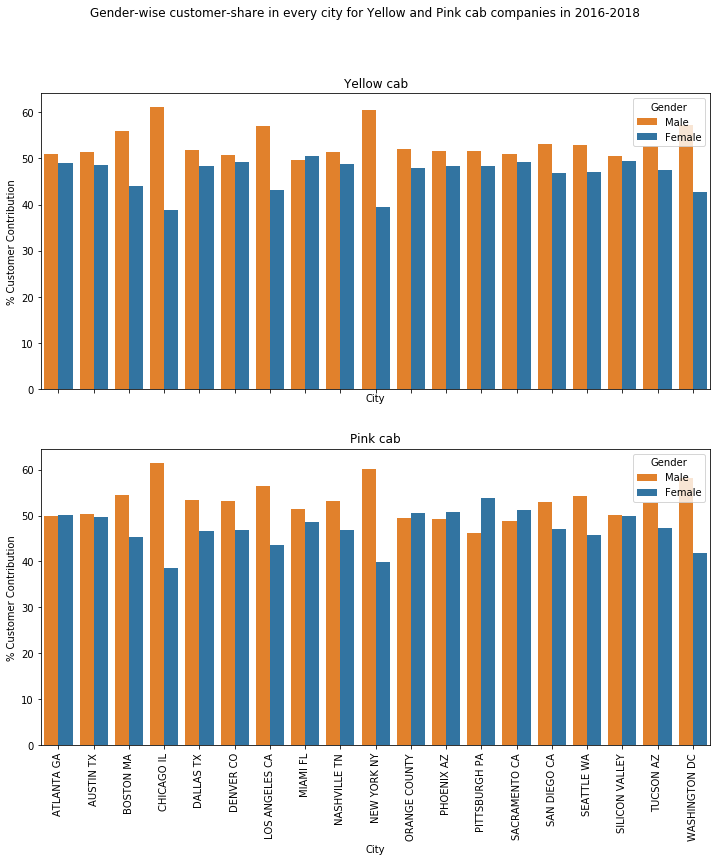

In [36]:
# 6.3. Gender-wise contribution to the customer base in every city for the Yellow and Pink cab companies
# for 2016-2018

y_gender_city_contri = yellow_cab.groupby('City').Gender.value_counts() * 100/yellow_cab.groupby('City').Gender.count()
y_gender_city_contri = pd.DataFrame(y_gender_city_contri).rename({'Gender':'% Customer Contribution'}, axis = 1).reset_index()
# print('% contribution to customer base in every city for Yellow cab:\n', y_gender_city_contri)

p_gender_city_contri = pink_cab.groupby('City').Gender.value_counts() * 100/pink_cab.groupby('City').Gender.count()
p_gender_city_contri = pd.DataFrame(p_gender_city_contri).rename({'Gender':'% Customer Contribution'}, axis = 1).reset_index()
# print('% contribution to customer base in every city for Pink cab:\n', p_gender_city_contri)

# Plotting the % customer contribution in every city for 2016-2018
fig,Ax = plt.subplots(2, 1, figsize = (12,12), sharex = True)
fig.suptitle('Gender-wise customer-share in every city for Yellow and Pink cab companies in 2016-2018')

palette = {'Male':'C1', 'Female':'C0'}
hue_order = ['Male', 'Female']

sns.barplot(ax = Ax[0], x = 'City', y = '% Customer Contribution', hue = 'Gender', hue_order = hue_order, data = y_gender_city_contri, palette = palette)
Ax[0].set_title('Yellow cab')

sns.barplot(ax = Ax[1], x = 'City', y = '% Customer Contribution', hue = 'Gender', hue_order = hue_order, data = p_gender_city_contri, palette = palette)
Ax[1].set_title('Pink cab')

plt.xticks(rotation = 90)
# plt.savefig('Gender-wise_customer_share_in_every_city_in_2016-2018.png')
plt.show()

Income group-wise contribution to the profits of the Yellow cab in 2016-2018:
    Year Income Group     Profit
0  2016         High  28.737504
1  2016          Low  30.624593
2  2016       Medium  40.637903
3  2017         High  29.373110
4  2017          Low  30.673625
Income group-wise contribution to the profits of the Pink cab in 2016-2018:
    Year Income Group     Profit
0  2016         High  29.342940
1  2016          Low  30.683555
2  2016       Medium  39.973505
3  2017         High  29.452477
4  2017          Low  31.549550


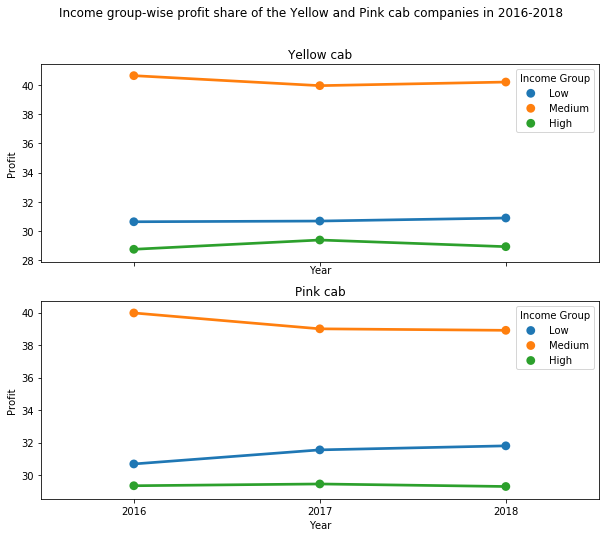

In [37]:
# 7. Income and age-group wise contribution to profit and customer base
# 7.1. Income group-wise profit share of Yellow and Pink cabs per year

# Min. income = $2000.0; Max. income = $ 35000.0
# 2 - 10k, 10 - 20k, 20 - 35k
# Low, Medium, High

# Yellow cab
y_incgrp_profit = pd.DataFrame(yellow_cab.groupby(['Year', 'Income Group'])['Profit'].sum()*100/yellow_cab.groupby('Year')['Profit'].sum()).reset_index()
print('Income group-wise contribution to the profits of the Yellow cab in 2016-2018:\n', y_incgrp_profit.head())

# Pink cab
p_incgrp_profit = pd.DataFrame(pink_cab.groupby(['Year', 'Income Group'])['Profit'].sum()*100/pink_cab.groupby('Year')['Profit'].sum()).reset_index()
print('Income group-wise contribution to the profits of the Pink cab in 2016-2018:\n', p_incgrp_profit.head())

# Plotting income group-wise profit share of Yellow and Pink cab companies in 2016-2018
hue_order = ['Low', 'Medium', 'High']
fig,ax = plt.subplots(2, 1, figsize = (10,8), sharex = True)
fig.suptitle('Income group-wise profit share of the Yellow and Pink cab companies in 2016-2018')
sns.pointplot(ax = ax[0], x = 'Year', y = 'Profit', hue = 'Income Group', data = y_incgrp_profit, hue_order = hue_order)
ax[0].set_title('Yellow cab')
sns.pointplot(ax = ax[1], x = 'Year', y = 'Profit', hue = 'Income Group', data = p_incgrp_profit, hue_order = hue_order)
ax[1].set_title('Pink cab')

# plt.savefig('Income_group-wise_profit_share_of_Yellow_and_Pink_cabs_in_2016-2018.png')
plt.show()


Age group-wise profit share % for yellow cab:
    Year Age Group   Profit %
0  2016     18-25  25.848588
1  2016     26-40  47.581244
2  2016     41-55  16.268542
3  2016     56-65  10.301626
4  2017     18-25  26.089272
Age group-wise profit share % for pink cab:
    Year Age Group   Profit %
0  2016     18-25  25.648369
1  2016     26-40  47.467424
2  2016     41-55  15.812158
3  2016     56-65  11.072048
4  2017     18-25  27.087930


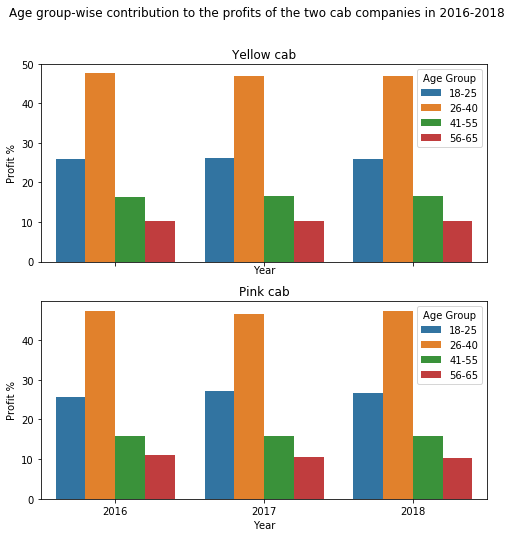

In [38]:
# 7.2. Age-group wise contribution to the profits of the Yellow and Pink cab companies in 2016-2018
# print(df.Age.describe())

# Min. Age - 18; Max. Age - 65
# 18 - 25; 26 - 35, 36 - 50, 51 - 65

# Yellow cab
y_age_profit_contri = yellow_cab.groupby(['Year', 'Age Group']).Profit.sum()*100/yellow_cab.groupby('Year').Profit.sum()
y_age_profit_contri = pd.DataFrame(y_age_profit_contri).rename({'Profit':'Profit %'}, axis = 1).reset_index()
print('Age group-wise profit share % for yellow cab:\n', y_age_profit_contri.head())

# Pink cab
p_age_profit_contri = pink_cab.groupby(['Year', 'Age Group']).Profit.sum()*100/pink_cab.groupby('Year').Profit.sum()
p_age_profit_contri = pd.DataFrame(p_age_profit_contri).rename({'Profit':'Profit %'}, axis = 1).reset_index()
print('Age group-wise profit share % for pink cab:\n', p_age_profit_contri.head())

# Plotting contribution by each age group to the profits per year for the Yellow and Pink cabs in 2016-2018
fig, A = plt.subplots(2,1,figsize = (8,8), sharex = True)
fig.suptitle('Age group-wise contribution to the profits of the two cab companies in 2016-2018')

sns.barplot(ax = A[0], x = 'Year', y = 'Profit %', hue = 'Age Group', data = y_age_profit_contri)
A[0].set_title('Yellow cab')

sns.barplot(ax = A[1], x = 'Year', y = 'Profit %', hue = 'Age Group', data = p_age_profit_contri)
A[1].set_title('Pink cab')
# plt.savefig('Age_group-wise_profit_share_%_in_2016-2018.png')
plt.show()

   Year Income Group  % Customers
0  2016         High    28.814796
1  2016          Low    31.307530
2  2016       Medium    39.877674
3  2017         High    29.227307
4  2017          Low    31.185774
   Year Income Group  % Customers
0  2016         High    29.294258
1  2016          Low    31.263955
2  2016       Medium    39.441786
3  2017         High    29.177798
4  2017          Low    31.410574


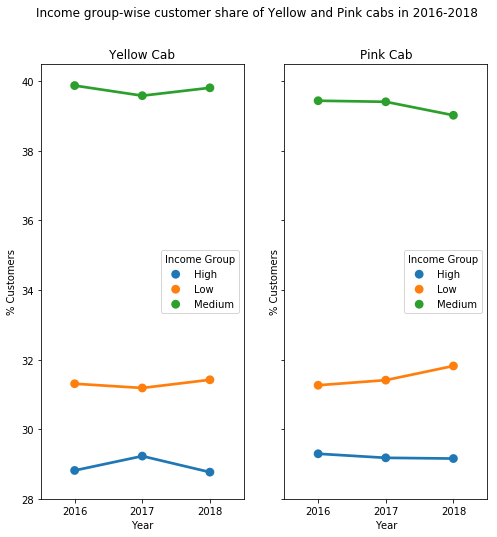

In [39]:
# 7.3. Income group-wise customer share of Yellow and Pink cabs per year for 2016-2018

y_incgrp_customer_contri = yellow_cab.groupby(['Year', 'Income Group'])['Customer ID'].count() * 100/ yellow_cab.groupby('Year')['Customer ID'].count()
y_incgrp_customer_contri = pd.DataFrame(y_incgrp_customer_contri).rename({'Customer ID':'% Customers'}, axis = 1).reset_index()
print(y_incgrp_customer_contri.head())

p_incgrp_customer_contri = pink_cab.groupby(['Year', 'Income Group'])['Customer ID'].count() * 100/ pink_cab.groupby('Year')['Customer ID'].count()
p_incgrp_customer_contri = pd.DataFrame(p_incgrp_customer_contri).rename({'Customer ID':'% Customers'}, axis = 1).reset_index()
print(p_incgrp_customer_contri.head())

# Plotting the customer share
fig, ax = plt.subplots(1, 2, figsize = (8,8), sharey = True)
fig.suptitle('Income group-wise customer share of Yellow and Pink cabs in 2016-2018')
sns.pointplot(ax = ax[0], x = 'Year', y = '% Customers', hue = 'Income Group', data = y_incgrp_customer_contri)
ax[0].set_title('Yellow Cab')

sns.pointplot(ax = ax[1], x = 'Year', y = '% Customers', hue = 'Income Group', data = p_incgrp_customer_contri)
ax[1].set_title('Pink Cab')

ax[0].set_ylim(28, 40.5)
ax[1].set_ylim(28, 40.5)

# plt.savefig('Income_group-wise_customer_share_%_in_2016-2018.png')
plt.show()

   Year Age Group  % Customers
0  2016     18-25    25.757852
1  2016     26-40    47.485986
2  2016     41-55    16.167512
3  2016     56-65    10.588650
4  2017     18-25    26.019208
   Year Age Group  % Customers
0  2016     18-25    25.717703
1  2016     26-40    47.440191
2  2016     41-55    15.889155
3  2016     56-65    10.952951
4  2017     18-25    26.602025


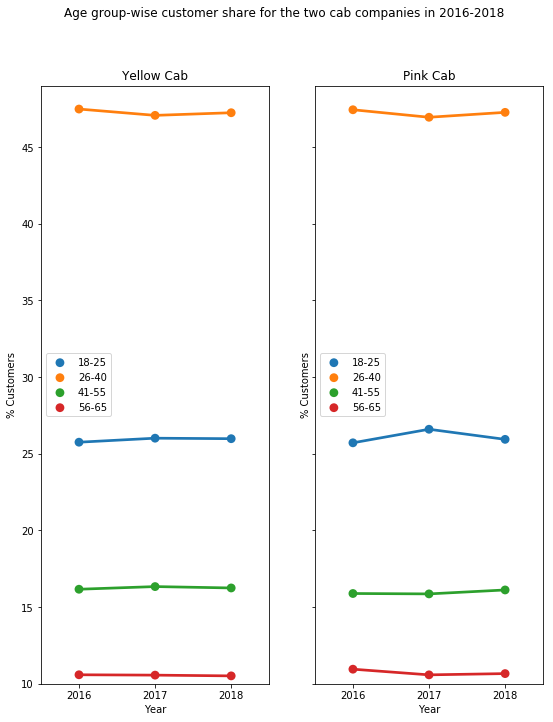

In [40]:
# 7.4. Age group-wise customer share of Yellow and Pink cabs in 2016-2018

y_agegrp_customer_contri = yellow_cab.groupby(['Year', 'Age Group'])['Customer ID'].count() * 100/ yellow_cab.groupby('Year')['Customer ID'].count()
y_agegrp_customer_contri = pd.DataFrame(y_agegrp_customer_contri).rename({'Customer ID':'% Customers'}, axis = 1).reset_index()
print(y_agegrp_customer_contri.head())

p_agegrp_customer_contri = pink_cab.groupby(['Year', 'Age Group'])['Customer ID'].count() * 100/ pink_cab.groupby('Year')['Customer ID'].count()
p_agegrp_customer_contri = pd.DataFrame(p_agegrp_customer_contri).rename({'Customer ID':'% Customers'}, axis = 1).reset_index()
print(p_agegrp_customer_contri.head())

# Plotting the income group-wise customer share of the two cab companies per year
fig, axis = plt.subplots(1, 2, figsize = (9,11), sharey = True)
fig.suptitle('Age group-wise customer share for the two cab companies in 2016-2018')

sns.pointplot(ax = axis[0], x = 'Year', y = '% Customers', hue = 'Age Group', data = y_agegrp_customer_contri)
axis[0].set_title('Yellow Cab')

sns.pointplot(ax = axis[1], x = 'Year', y = '% Customers', hue = 'Age Group', data = p_agegrp_customer_contri)
axis[1].set_title('Pink Cab')

axis[0].set_ylim(10, 49)
axis[1].set_ylim(10, 49)
axis[0].legend(loc = 'center left')
axis[1].legend(loc = 'center left')

# plt.savefig('Age_group-wise_customer_share_%_in_2016-2018.png')
plt.show()



Customer retention % of the Yellow cab considering customers who took >= 5 rides:
    Year  Customer retention %
0  2016             24.104561
1  2017             27.942711
2  2018             26.832909
Customer retention % of the Pink cab considering customers who took >= 5 rides:
    Year  Customer retention %
0  2016              1.206410
1  2017              2.108030
2  2018              1.826087


Customer retention % of the Yellow cab considering customers who took >= 10 rides:
    Year  Customer retention %
0  2016              4.345144
1  2017              7.287056
2  2018              6.494357
Customer retention % of the Pink cab considering customers who took >= 10 rides:
    Year  Customer retention %
0  2016              0.006002
1  2017              0.016092
2  2018              0.000000


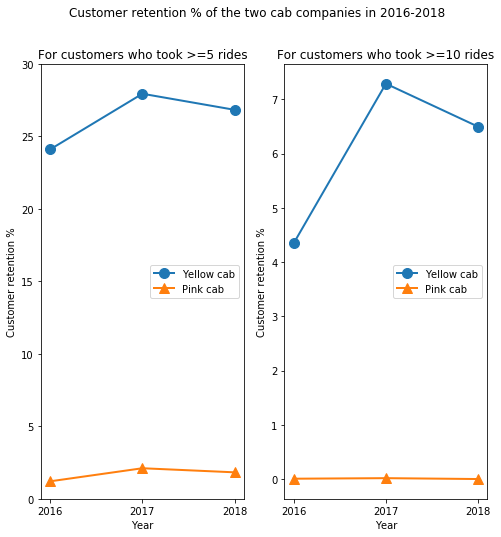

In [41]:
# 8. Customer retention by each cab company
# % of customers retained by each cab company
# No. of customers who took more than a threshold of rides with a company divided by
# the total no. of customers of that company in the particular year.

y_cust_ridecount = pd.DataFrame(yellow_cab.groupby('Year')['Customer ID'].value_counts()).rename({'Customer ID':'num'}, axis = 1).reset_index()
# print('No. of rides taken by each customer per year with the Yellow cab:\n', y_cust_ridecount.head())

p_cust_ridecount = pd.DataFrame(pink_cab.groupby('Year')['Customer ID'].value_counts()).rename({'Customer ID':'num'}, axis = 1).reset_index()
# print('No. of rides taken by each customer per year with the Pink cab:\n', p_cust_ridecount.head())

# For customers who took >=5 rides with same cab company
y_custretention_5rides = []
p_custretention_5rides = []

for year in [2016,2017,2018]:
    y_cust = (y_cust_ridecount[y_cust_ridecount.Year == year]['num']>=5).sum()*100 / y_cust_ridecount[y_cust_ridecount.Year == year]['Customer ID'].count()
    p_cust = (p_cust_ridecount[p_cust_ridecount.Year == year]['num']>=5).sum()*100 / p_cust_ridecount[p_cust_ridecount.Year == year]['Customer ID'].count()
    y_custretention_5rides.append(y_cust)
    p_custretention_5rides.append(p_cust)

y_custretention_5rides = pd.DataFrame({'Year':[2016, 2017, 2018], 'Customer retention %':y_custretention_5rides})
p_custretention_5rides = pd.DataFrame({'Year':[2016, 2017, 2018], 'Customer retention %':p_custretention_5rides})
print('\n')
print('Customer retention % of the Yellow cab considering customers who took >= 5 rides:\n', y_custretention_5rides)
print('Customer retention % of the Pink cab considering customers who took >= 5 rides:\n', p_custretention_5rides)

# For customers who took >=10 rides with same cab company
y_custretention_10rides = []
p_custretention_10rides = []

for year in [2016,2017,2018]:
    y_customer = (y_cust_ridecount[y_cust_ridecount.Year == year]['num']>=10).sum()*100 / y_cust_ridecount[y_cust_ridecount.Year == year]['Customer ID'].count()
    p_customer = (p_cust_ridecount[p_cust_ridecount.Year == year]['num']>=10).sum()*100 / p_cust_ridecount[p_cust_ridecount.Year == year]['Customer ID'].count()
    y_custretention_10rides.append(y_customer)
    p_custretention_10rides.append(p_customer)

y_custretention_10rides = pd.DataFrame({'Year':[2016, 2017, 2018], 'Customer retention %':y_custretention_10rides})
p_custretention_10rides = pd.DataFrame({'Year':[2016, 2017, 2018], 'Customer retention %':p_custretention_10rides})
print('\n')
print('Customer retention % of the Yellow cab considering customers who took >= 10 rides:\n', y_custretention_10rides)
print('Customer retention % of the Pink cab considering customers who took >= 10 rides:\n', p_custretention_10rides)

# Plotting the customer retention % of Yellow and Pink cabs in 2016-2018
fig, axes = plt.subplots(1, 2, figsize = (8,8), sharex = True)
fig.suptitle('Customer retention % of the two cab companies in 2016-2018')
axes[0].plot(y_custretention_5rides['Year'], y_custretention_5rides['Customer retention %'], label = 'Yellow cab', marker = 'o', markersize = 10, linestyle = '-', linewidth = 2)
axes[0].plot(p_custretention_5rides['Year'], p_custretention_5rides['Customer retention %'], label = 'Pink cab', marker = '^', markersize = 10, linestyle = '-', linewidth = 2)
axes[0].set_title('Yellow Cab')

axes[1].plot(y_custretention_10rides['Year'], y_custretention_10rides['Customer retention %'], label = 'Yellow cab', marker = 'o', markersize = 10, linestyle = '-', linewidth = 2)
axes[1].plot(p_custretention_10rides['Year'], p_custretention_10rides['Customer retention %'], label = 'Pink cab', marker = '^', markersize = 10, linestyle = '-', linewidth = 2)
axes[1].set_title('Pink Cab')

axes[0].set_title('For customers who took >=5 rides')
axes[1].set_title('For customers who took >=10 rides')
axes[0].set_ylim(0,30)
axes[0].set_xticks([2016, 2017, 2018])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Customer retention %')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Customer retention %')

axes[0].legend()
axes[1].legend()
# plt.savefig('Customer_retention_%_for_5_and_10_rides_in_2016-2018.png')
plt.show()


         City  Yellow_cab_customers     Users  Pink_cab_customers  \
0  ATLANTA GA                  5795   24701.0                1762   
1   AUSTIN TX                  3028   14978.0                1868   
2   BOSTON MA                 24506   80021.0                5186   
3  CHICAGO IL                 47264  164468.0                9361   
4   DALLAS TX                  5637   22157.0                1380   

   Coverage of Yellow cab  Coverage of Pink cab  
0               23.460589              7.133314  
1               20.216317             12.471625  
2               30.624461              6.480799  
3               28.737505              5.691685  
4               25.441170              6.228280  


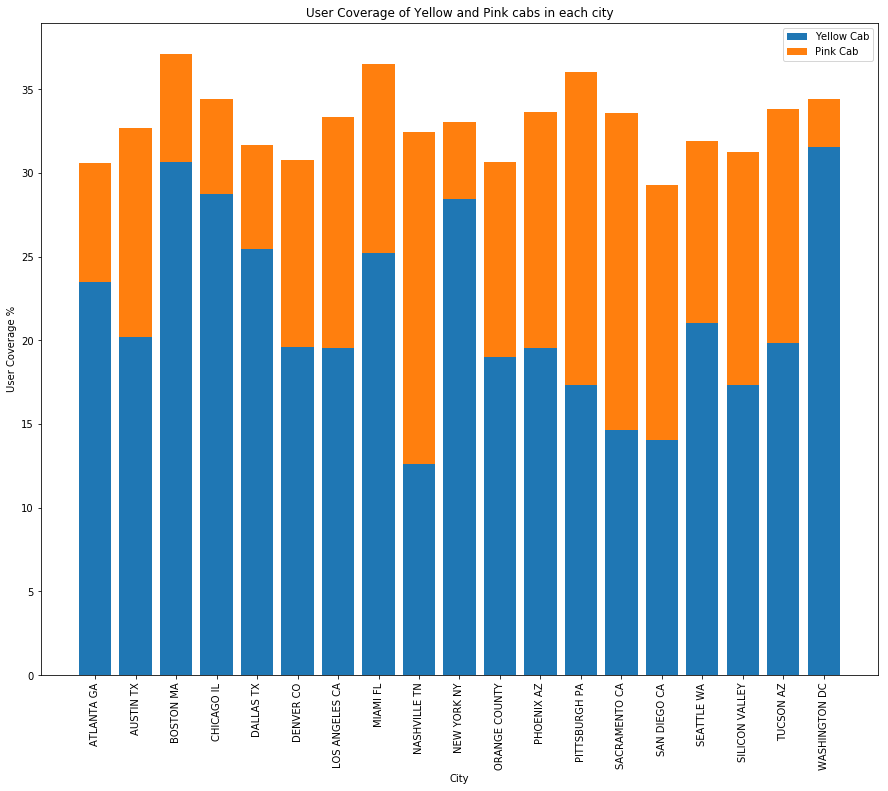

In [121]:
# 9. Coverage of each cab company
# 'Users' feature indicating total number of cab users in the city
# Coverage - % of users travelling with the Yellow/Pink cab out of all cab users

y_customercount = pd.DataFrame(yellow_cab.groupby('City')['Customer ID'].count()).rename({'Customer ID':'Yellow_cab_customers'}, axis = 1).reset_index()
p_customercount = pd.DataFrame(pink_cab.groupby('City')['Customer ID'].count()).rename({'Customer ID':'Pink_cab_customers'}, axis = 1).reset_index()
user_count = pd.DataFrame(city_data[['City', 'Users']]).sort_values('City', ascending = True).reset_index(drop = True)

customer_temp = pd.merge(y_customercount, user_count, on = 'City', how = 'inner')
customer_user_merged = pd.merge(customer_temp, p_customercount, on = 'City', how = 'inner')
# SAN FRANCISCO CA - No customer data

customer_user_merged['Coverage of Yellow cab'] = customer_user_merged['Yellow_cab_customers']*100/customer_user_merged['Users']
customer_user_merged['Coverage of Pink cab'] = customer_user_merged['Pink_cab_customers']*100/customer_user_merged['Users']
print(customer_user_merged.head())

x = customer_user_merged['City']
y1 = customer_user_merged['Coverage of Yellow cab']
y2 = customer_user_merged['Coverage of Pink cab']

# Plotting the user coverage of each cab company
plt.figure(figsize = (15,12))
plt.title('User Coverage of Yellow and Pink cabs in each city')

plt.bar(x, y1, label = 'Yellow Cab', color = 'C0')
plt.bar(x, y2, label = 'Pink Cab', bottom = y1, color = 'C1')

# plt.ylim(0,39)
plt.xticks(rotation = 90)
plt.xlabel('City')
plt.ylabel('User Coverage %')
plt.legend()
# plt.savefig('User_coverage_of_Yellow_and_Pink_cabs_in_each_city.png')
plt.show()

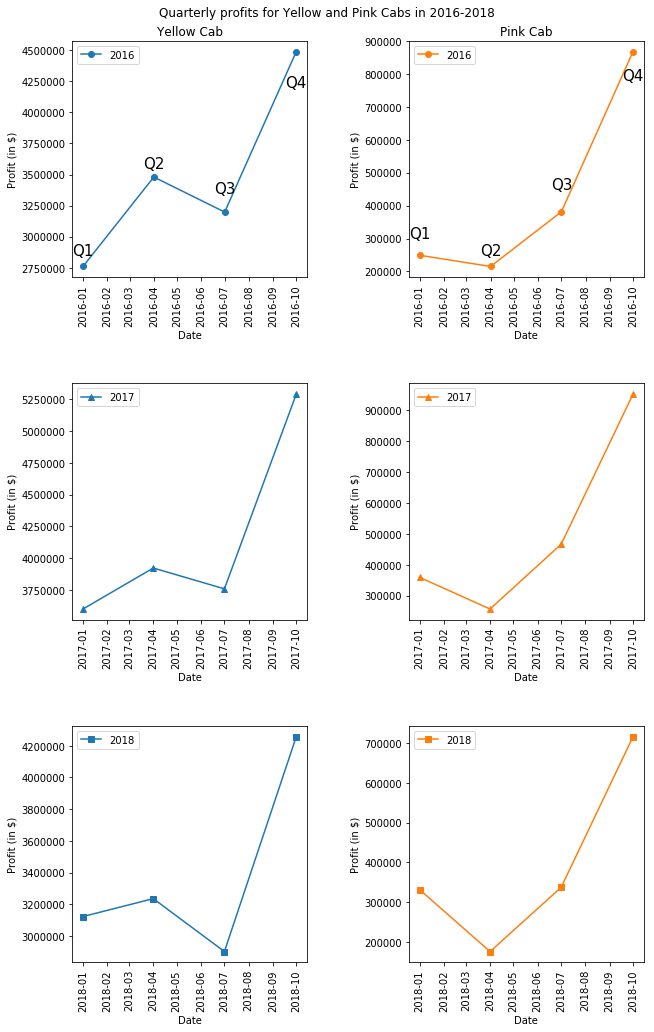

In [122]:
# 10. Seasonality in the net profit of the two cab companies
# No monthly trends found
# Looking at four-quarter trend

y_seasonality = pd.DataFrame(yellow_cab.groupby(['Travel_Date']).Profit.sum()).reset_index()
# print(y_seasonality.head())
# print(y_seasonality.info())
p_seasonality = pd.DataFrame(pink_cab.groupby(['Travel_Date']).Profit.sum()).reset_index()

y_seasonality.Travel_Date = pd.to_datetime(y_seasonality.Travel_Date)
y_seasonality.set_index('Travel_Date', inplace = True)

p_seasonality.Travel_Date = pd.to_datetime(p_seasonality.Travel_Date)
p_seasonality.set_index('Travel_Date', inplace = True)

# Four-quarter trend
y_quartersum = y_seasonality.resample('QS').sum()
p_quartersum = p_seasonality.resample('QS').sum()

quarter_2016 = y_quartersum.index < datetime.datetime(2017,1,1)
quarter_2017 = (y_quartersum.index > datetime.datetime(2016,12,31)) & (y_quartersum.index < datetime.datetime(2018,1,1))
quarter_2018 = (y_quartersum.index > datetime.datetime(2017,12,31)) & (y_quartersum.index < datetime.datetime(2019,1,1))

# Plotting Seasonality in profits of Yellow and Pink cabs
Fig, axis = plt.subplots(3, 2, figsize = (10, 15))
Fig.suptitle('Quarterly profits for Yellow and Pink Cabs in 2016-2018', fontsize = 12)
axis[0,0].plot(y_quartersum[quarter_2016].index, y_quartersum[quarter_2016].Profit, label = '2016', color = 'C0', marker = 'o')
axis[1,0].plot(y_quartersum[quarter_2017].index, y_quartersum[quarter_2017].Profit, label = '2017', color = 'C0', marker = '^')
axis[2,0].plot(y_quartersum[quarter_2018].index, y_quartersum[quarter_2018].Profit, label = '2018', color = 'C0', marker = 's')

axis[0,1].plot(p_quartersum[quarter_2016].index, p_quartersum[quarter_2016].Profit, label = '2016', color = 'C1', marker = 'o')
axis[1,1].plot(p_quartersum[quarter_2017].index, p_quartersum[quarter_2017].Profit, label = '2017', color = 'C1', marker = '^')
axis[2,1].plot(p_quartersum[quarter_2018].index, p_quartersum[quarter_2018].Profit, label = '2018', color = 'C1', marker = 's')


axis[0,0].text(datetime.datetime(2016,1,1), 2850000, 'Q1', horizontalalignment = 'center', fontsize = 15)
axis[0,0].text(datetime.datetime(2016,4,1), 3550000, 'Q2', horizontalalignment = 'center', fontsize = 15)
axis[0,0].text(datetime.datetime(2016,7,1), 3350000, 'Q3', horizontalalignment = 'center', fontsize = 15)
axis[0,0].text(datetime.datetime(2016,10,1), 4200000, 'Q4', horizontalalignment = 'center', fontsize = 15)

axis[0,1].text(datetime.datetime(2016,1,1), 300000, 'Q1', horizontalalignment = 'center', fontsize = 15)
axis[0,1].text(datetime.datetime(2016,4,1), 250000, 'Q2', horizontalalignment = 'center', fontsize = 15)
axis[0,1].text(datetime.datetime(2016,7,1), 450000, 'Q3', horizontalalignment = 'center', fontsize = 15)
axis[0,1].text(datetime.datetime(2016,10,1), 780000, 'Q4', horizontalalignment = 'center', fontsize = 15)

axis[0,0].set_title('Yellow Cab')
axis[0,1].set_title('Pink Cab')
axis[0,0].set_xlabel('Date')
axis[1,0].set_xlabel('Date')
axis[2,0].set_xlabel('Date')
axis[0,0].set_ylabel('Profit (in $)')
axis[1,0].set_ylabel('Profit (in $)')
axis[2,0].set_ylabel('Profit (in $)')

axis[0,1].set_xlabel('Date')
axis[1,1].set_xlabel('Date')
axis[2,1].set_xlabel('Date')
axis[0,1].set_ylabel('Profit (in $)')
axis[1,1].set_ylabel('Profit (in $)')
axis[2,1].set_ylabel('Profit (in $)')


axis[0,0].tick_params(axis = 'x', labelrotation = 90)
axis[1,0].tick_params(axis = 'x', labelrotation = 90)
axis[2,0].tick_params(axis = 'x', labelrotation = 90)
axis[0,1].tick_params(axis = 'x', labelrotation = 90)
axis[1,1].tick_params(axis = 'x', labelrotation = 90)
axis[2,1].tick_params(axis = 'x', labelrotation = 90)

axis[0,0].legend()
axis[1,0].legend()
axis[2,0].legend()

axis[0,1].legend()
axis[1,1].legend()
axis[2,1].legend()


plt.tight_layout(4.00)

# plt.savefig('Quarterly_seasonality_in_profits_for_yellow_and_pink_cabs_in_2016-2018.png')
plt.show()

# Conclusion: There is a quarterly seasonality in the profits of the Yellow and Pink Cab for 2016-2018

    Company         Holiday  Holiday_Profit
0  Pink Cab     4th of July        3531.231
1  Pink Cab   Christmas Day       34583.629
2  Pink Cab   Christmas Eve       54255.224
3  Pink Cab    Columbus Day        9749.662
4  Pink Cab  Eastern Easter        7561.224


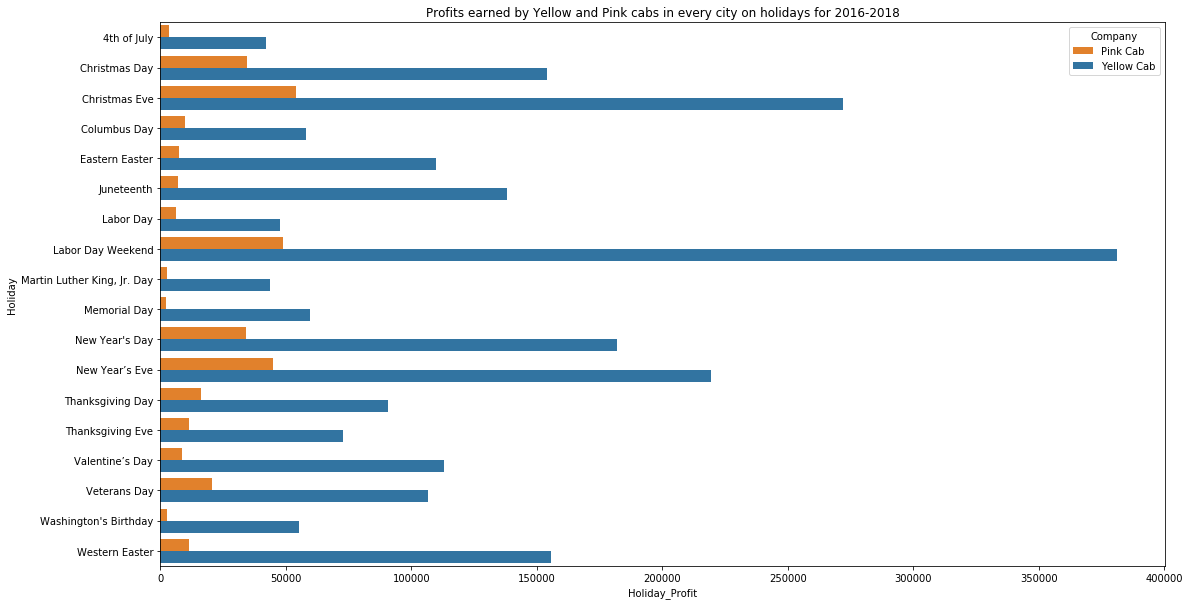

In [129]:
# 11. Analysing travel on Holidays
# 11.1. Looking at Profits earned by Yellow and Pink cabs on Holidays in every city

# Adding Profit feature in this dataframe
Holiday_data['Holiday_Profit'] = Holiday_data['Price Charged'] - Holiday_data['Cost of Trip']
# print(Holiday_data.head())

# Profits of yellow and pink cabs on holidays in 2016-2018
holiday_profit = Holiday_data.groupby(['Company', 'Holiday']).Holiday_Profit.sum()
holiday_profit = pd.DataFrame(holiday_profit).reset_index()
print(holiday_profit.head())

# Plotting the profits on holidays over all cities
plt.figure(figsize = (18,10))
plt.title('Profits earned by Yellow and Pink cabs in every city on holidays for 2016-2018')
sns.barplot(x = 'Holiday_Profit', y = 'Holiday', hue = 'Company', data = holiday_profit, palette = {'Yellow Cab':'C0', 'Pink Cab':'C1'})
# plt.grid()

# plt.savefig('Profits_earned_by_Yellow_and_Pink_cabs_in_every_city_on_holidays_for_2016-2018.png')
plt.show()

    Company         Holiday  No. of rides
0  Pink Cab     4th of July           108
1  Pink Cab   Christmas Day           337
2  Pink Cab   Christmas Eve           480
3  Pink Cab    Columbus Day           188
4  Pink Cab  Eastern Easter           113


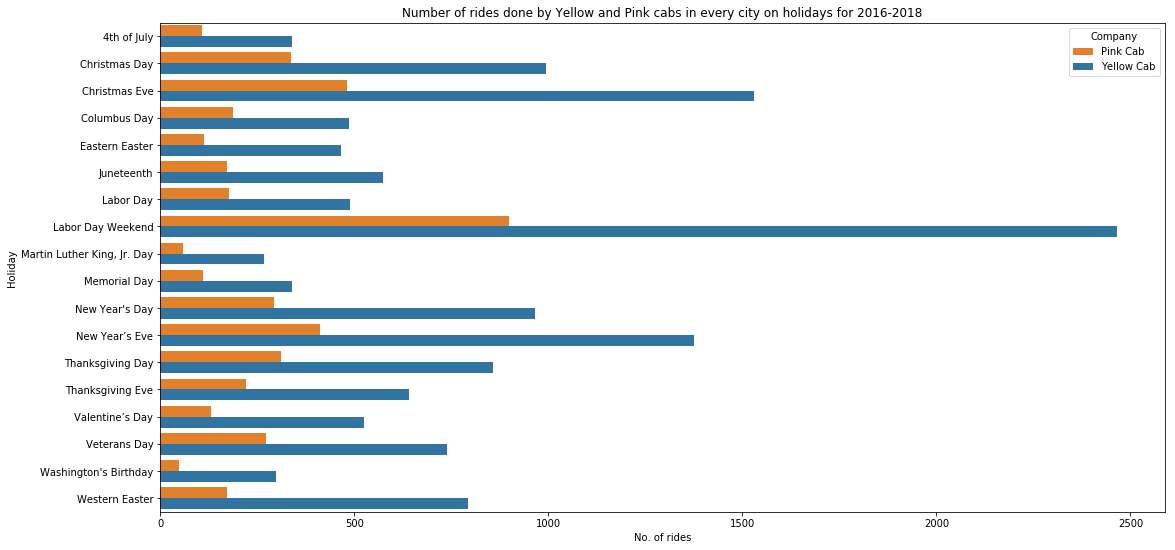

In [133]:
# 11.2. No. of rides taken with Yellow and Pink cabs in every city on holidays for 2016-2018
holiday_numrides = Holiday_data.groupby(['Company', 'Holiday'])['Transaction ID'].count()
holiday_numrides = pd.DataFrame(holiday_numrides).rename({'Transaction ID':'No. of rides'}, axis = 1).reset_index()
print(holiday_numrides.head())

# Plotting the number of rides
plt.figure(figsize = (18,9))
plt.title('Number of rides done by Yellow and Pink cabs in every city on holidays for 2016-2018')
sns.barplot(x = 'No. of rides', y = 'Holiday', hue = 'Company', data = holiday_numrides, palette = {'Yellow Cab':'C0', 'Pink Cab':'C1'})
# plt.grid()
# plt.savefig('No._of_rides_done_by_Yellow_and_Pink_cabs_in_every_city_on_holdays_for_2016-2018.png')
plt.show()